# Sentiment Analysis on Amazon product review data

### Author: Jurat Shayiding (jshayi2@uic.edu)

In [1]:
## load python dependencies
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
### read product review dataset
data=pd.read_csv("amazon_prod_dataset\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
data.shape
row=data.shape[0]
cols=data.shape[1]
print('dim: ', data.shape)
print("----------------")
print('total rows:', row)
print("----------------")
print('toal columns: ', cols)
print("----------------")
print('columns: \n', data.columns.values)

dim:  (28332, 24)
----------------
total rows: 28332
----------------
toal columns:  24
----------------
columns: 
 ['id' 'dateAdded' 'dateUpdated' 'name' 'asins' 'brand' 'categories'
 'primaryCategories' 'imageURLs' 'keys' 'manufacturer'
 'manufacturerNumber' 'reviews.date' 'reviews.dateSeen'
 'reviews.didPurchase' 'reviews.doRecommend' 'reviews.id'
 'reviews.numHelpful' 'reviews.rating' 'reviews.sourceURLs' 'reviews.text'
 'reviews.title' 'reviews.username' 'sourceURLs']


## data exploration

In [4]:
## keep the columns that needed for performing sentiment analysis
import nltk
sent_data = data[['reviews.rating', 'reviews.text', 'reviews.title']]
#sent_data2 = data[['reviews.text']]
sent_data2 = sent_data.copy()

# adds another column to the dataframe sent_data2, the tokenized text
sent_data2['tokenized_sents'] = sent_data2['reviews.text'].apply(str.split)

# adds a third column with the tagged text
sent_data2['tagged_sents'] = sent_data2['tokenized_sents'].apply(nltk.pos_tag)

# helper function to get the adj's
def getAdj(tagged):
    l = []
    for (w, t) in tagged:
        if t == 'JJ' or t == 'JJR' or t == 'JJS':
            l.append(w)
    return l
        
        # t = ( t[0], t[1] )

# adds a fourth column with the adj tagged text        
sent_data2['adj_tagged_sents'] = sent_data2['tagged_sents'].apply(getAdj)

def listToString(s):
    str1 = " "
    return (str1.join(s))

# adds a fifth column with the adj tagged text NOT in list form      
sent_data2['adj_tagged_sents2'] = sent_data2['adj_tagged_sents'].apply(listToString)





print('explore filtered review data: \n', sent_data2.head())
print("==================================================")
print("explore the descriptive statistics: \n", sent_data2.info)
print("==================================================")
print("data description: \n", sent_data.describe())
print("explore the descriptive statistics: \n", sent_data2.info)
print("==================================================")
print("dimension info: \n", sent_data2.shape)

explore filtered review data: 
    reviews.rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                       reviews.title  \
0  ... 3 of them and one of the item is bad quali...   
1  ... always the less expensive way to go for pr...   
2  ... are not Duracell but for the price i am ha...   
3  ... as well as name brand batteries at a much ...   
4  ... batteries are very long lasting the price ...   

                                     tokenized_sents  \
0  [I, order, 3, of, them, and, one, of, the, ite...   
1  [Bulk, is, always, the, less, expensive, way, ...   
2  [Well, they, are, not, Dura

In [6]:
### sanity check
print("tot null values in dataset: \n", sent_data2.isnull().sum())
print("========================================================")
print("tot na entries in dataset: \n", sent_data2.isna().sum())
print("========================================================")

tot null values in dataset: 
 reviews.rating      0
reviews.text        0
reviews.title       0
tokenized_sents     0
tagged_sents        0
adj_tagged_sents    0
dtype: int64
tot na entries in dataset: 
 reviews.rating      0
reviews.text        0
reviews.title       0
tokenized_sents     0
tagged_sents        0
adj_tagged_sents    0
dtype: int64


review rating statistics: 
 2      616
1      965
3     1206
4     5648
5    19897
Name: reviews.rating, dtype: int64


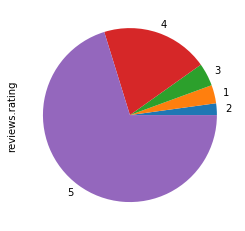

In [5]:
### handly exploratory analysis on product review data
sent_data2=sent_data2.dropna(how="any")
rev_stats = sent_data2['reviews.rating'].value_counts().sort_values()
print("review rating statistics: \n", rev_stats)
print("==================================================")
sent_data2['reviews.rating'].value_counts().sort_values().plot.pie()


In [6]:
sent_data2 = sent_data2[sent_data2["reviews.rating"].notnull()]
print("data overview: \n", sent_data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28332 entries, 0 to 28331
Data columns (total 7 columns):
reviews.rating       28332 non-null int64
reviews.text         28332 non-null object
reviews.title        28332 non-null object
tokenized_sents      28332 non-null object
tagged_sents         28332 non-null object
adj_tagged_sents     28332 non-null object
adj_tagged_sents2    28332 non-null object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB
data overview: 
 None


In [9]:
### label product review data (positive, or negative)
# sent_data["sentiment_label"]=sent_data["reviews.rating"]>=4
# sent_data["sentiment_label"]=sent_data["sentiment_label"].replace([True, False], ["Positive","Negative"])
# sent_data["sentiment_label"].value_counts().sort_values().plot.pie()

### data preprocessing

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Death\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Death\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### basic sentiment analysis

In [8]:
## helper function to determine sentiment for given review text
## to do so, we can use pre-generated positive / negative english words
neg_words=pd.read_csv("amazon_prod_dataset/negative.csv")
pos_words=pd.read_csv("amazon_prod_dataset/pos.csv")
print("negative english words: \n", neg_words.head())
print("=====================================")
print("positive english words: \n", pos_words.head())

negative english words: 
         words
0     2-faced
1     2-faces
2    abnormal
3     abolish
4  abominable
positive english words: 
        words
0         a+
1     abound
2    abounds
3  abundance
4   abundant


In [12]:
# txt=sent_data["reviews.text"][0]
# tokens= word_tokenize(txt)
# print('text,,\n', txt)
# print("=============")
# print("tokens:\n", tokens)
# print("=============")
# tkens=[''.join(x for x in y if x not in string.punctuation) for y in tokens]
# print("curious: \n", tkens)
# print("=============")
# non_stopwords=[x for x in tkens if x not in stopwords.words("english")]
# print("non stopwords: \n", non_stopwords) 

In [21]:
### helper function to decide sentiment factor in given text
def assign_sentiment(sent):
    neg_cnt=0
    pos_cnt=0
    neu_cnt=0
    tokenized_sent=word_tokenize(sent)
    tokenized_words=[''.join(x for x in y if x not in string.punctuation) for y in tokenized_sent]
    non_stopwords=[x for x in tokenized_words if x not in stopwords.words("english")]
    for word in non_stopwords:
        if word in neg_words:
            neg_cnt+=1
        elif word in pos_words:
            pos_cnt+=1
        else:
            neu_cnt+=1
    if pos_cnt>neg_cnt:
        return +1
    elif neg_cnt>pos_cnt:
        return -1
    else:
        return 0

In [25]:
### print out positive, negative, neutral reviews from original product review data
pos_reviews=0
neg_reviews=0
neu_reviews=0

print(sent_data['reviews.text'].head(10))
print(sent_data2['adj_tagged_sents2'].head(10))

for review in sent_data2['adj_tagged_sents2']:
    cnt=assign_sentiment(review)
    if cnt==1:
        pos_reviews+=1
    elif cnt==-1:
        neg_reviews+=1
    else:
        neu_reviews+=1

0    I order 3 of them and one of the item is bad q...
1    Bulk is always the less expensive way to go fo...
2    Well they are not Duracell but for the price i...
3    Seem to work as well as name brand batteries a...
4    These batteries are very long lasting the pric...
5    Bought a lot of batteries for Christmas and th...
6    ive not had any problame with these batteries ...
7    Well if you are looking for cheap non-recharge...
8    These do not hold the amount of high power jui...
9    AmazonBasics AA AAA batteries have done well b...
Name: reviews.text, dtype: object
0                                          bad
1                                    expensive
2                                             
3                                       better
4                                       great.
5                                 good. easier
6                            ive past pleased.
7    cheap non-rechargeable last perfect. more
8                                       

KeyboardInterrupt: 

([<matplotlib.patches.Wedge at 0x1a85618cf60>,
 [Text(1.1000000000000003, 1.905255888325765, 'Positive'),
  Text(1.2000000000000004, 2.078460969082653, 'Negative'),
  Text(-1.199999999999999, -2.0784609690826534, 'Neutral')],
 [Text(0.6000000000000001, 1.0392304845413263, ' 0.0%'),
  Text(0.7000000000000002, 1.212435565298214, ' 0.0%'),
  Text(-0.6999999999999995, -1.2124355652982142, '100.0%')])

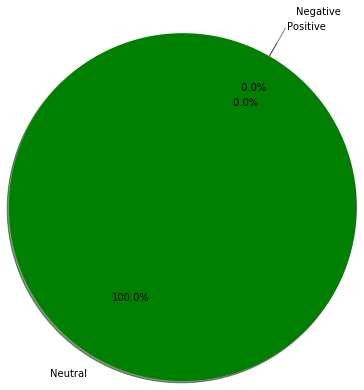

In [57]:
### plot piechart for the sentiment output

colors = ["red", "blue", "green"]

plt.pie([pos_reviews, neg_reviews, neu_reviews], labels=["Positive", "Negative", "Neutral"],
       explode=(0, 0.2, 0.2), autopct='%4.1f%%', shadow=True, startangle=60, radius=2, colors=colors)

### Remark

from above plot we can see that porportion of positive, neutral and negative reviews are quite unusal. To get better result, I intend to use feature engineering to train respective machine learning classifier to predict unlabled review data.

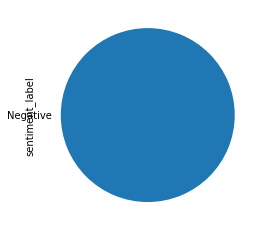

In [26]:
## another way of assigning sentiment label to reviews

def sentiment_labeler(score):
    if (score==5) or (score==4):
        return "Positive"
    elif (score==3):
        return "Neutral"
    else:
        return "Negative"
    
sent_data2["sentiment_label"]=sent_data2["adj_tagged_sents2"].apply(sentiment_labeler)
print("==========================================================")
sent_data2["sentiment_label"].value_counts().sort_values().plot.pie()

In [27]:
### data preparing

from sklearn.model_selection import StratifiedShuffleSplit

split_data=StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for tr_indx, ts_indx in split_data.split(sent_data2, sent_data2["reviews.rating"]):
    train_data=sent_data2.reindex(tr_indx)
    test_data=sent_data2.reindex(ts_indx)

print("====================================")
print("size of splitted train data: \n", train_data.shape)
print("====================================")
print("size of splitted test data: \n", test_data.shape)

size of splitted train data: 
 (22665, 8)
size of splitted test data: 
 (5667, 8)


In [28]:
## sanity check
tr_data_stats= train_data["reviews.rating"].value_counts()/len(train_data)

print("sanity check for porportion of diff scale rating: \n", tr_data_stats)

print("=================================================")
ts_data_stats= test_data["reviews.rating"].value_counts()/len(test_data)

print("sanity check for porportion of diff scale rating in training data: \n", tr_data_stats)

sanity check for porportion of diff scale rating: 
 5    0.702272
4    0.199338
3    0.042577
1    0.034061
2    0.021752
Name: reviews.rating, dtype: float64
sanity check for porportion of diff scale rating in training data: 
 5    0.702272
4    0.199338
3    0.042577
1    0.034061
2    0.021752
Name: reviews.rating, dtype: float64


#### prepare data

In [29]:
X_train=train_data['adj_tagged_sents2']
y_train=train_data["sentiment_label"]
X_test=test_data["adj_tagged_sents2"]
y_test=test_data["sentiment_label"]
print("dim of training data:\n", X_train.shape)
print("================================")
print("dim of testing data:\n", X_test.shape)

dim of training data:
 (22665,)
dim of testing data:
 (5667,)


### Feature Engineering

In [30]:
## feature 1: bag of words w/bigram
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_train=X_train.fillna(' ')
X_test=X_test.fillna(' ')
y_train=y_train.fillna(' ')
y_test=y_test.fillna(' ')

X_train_cnts=CountVectorizer(ngram_range=(1,2)).fit_transform(X_train)
print("dim of bag of words: \n", X_train_cnts.shape)
print("===========================================")
print("===========================================")

Tfidf=TfidfTransformer(use_idf=False)
X_train_tfidf=Tfidf.fit_transform(X_train_cnts)
print("tfidf for X_train", X_train_tfidf)

dim of bag of words: 
 (22665, 21219)
tfidf for X_train   (2, 2728)	0.22941573387056174
  (2, 2735)	0.22941573387056174
  (2, 3013)	0.22941573387056174
  (2, 3049)	0.22941573387056174
  (2, 5830)	0.22941573387056174
  (2, 5865)	0.22941573387056174
  (2, 7103)	0.22941573387056174
  (2, 7352)	0.22941573387056174
  (2, 11418)	0.22941573387056174
  (2, 13309)	0.22941573387056174
  (2, 13310)	0.22941573387056174
  (2, 14157)	0.4588314677411235
  (2, 14248)	0.22941573387056174
  (2, 14305)	0.22941573387056174
  (2, 16702)	0.22941573387056174
  (2, 16703)	0.22941573387056174
  (4, 1334)	0.30151134457776363
  (4, 1337)	0.30151134457776363
  (4, 2352)	0.30151134457776363
  (4, 2355)	0.30151134457776363
  (4, 2999)	0.30151134457776363
  (4, 3000)	0.30151134457776363
  (4, 8445)	0.30151134457776363
  (4, 10513)	0.30151134457776363
  (4, 10524)	0.30151134457776363
  :	:
  (22659, 16956)	0.2182178902359924
  (22659, 20288)	0.2182178902359924
  (22659, 20299)	0.2182178902359924
  (22660, 1939)	0.377

In [31]:
### build machine learning models from extracted bag of words features

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [36]:
## use multinomial NB classifier
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train,y_train)
predicted_nb = clf_multiNB_pipe.predict(X_test)
print("accuracy metrics for training naive bayes classifier:\n",metrics.classification_report(y_test, predicted_nb, target_names = ['1','0','-1']))
print("======================================================================================")

# ## use logistic regression
LR = LogisticRegression()
# text_pipe_LR = Pipeline([('tfidf', TfidfVectorizer()), ('LR', LR)])
clf_logitReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logitReg", LogisticRegression())])
clf_logitReg_pipe.fit(X_train,y_train)
predicted_lr = clf_logitReg_pipe.predict(X_test)
print("accuracy metrics for logistic regression classifier:\n",metrics.classification_report(y_test, predicted_lr, target_names = ['1','0','-1']))
print("======================================================================================")
# ## use SGD classifier
sgd_clf = linear_model.SGDClassifier(max_iter=1000)
clf_sgd_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_SGD", sgd_clf)])
clf_sgd_pipe.fit(X_train,y_train)
predicted_sgd = clf_sgd_pipe.predict(X_test)
print("accuracy metrics for SGD classifier:\n",metrics.classification_report(y_test, predicted_sgd, target_names = ['1','0','-1']))

print("======================================================================================")
# ## use SVC classifier
clf_svc_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_svc", LinearSVC())])
clf_svc_pipe.fit(X_train,y_train)
predicted_svc = clf_svc_pipe.predict(X_test)
print("accuracy metrics for SVC classifier:\n",metrics.classification_report(y_test, predicted_svc, target_names = ['1','0','-1']))

print("======================================================================================")
# ## use decision tree classifier
clf_dt_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_dt", DecisionTreeClassifier())])
clf_dt_pipe.fit(X_train,y_train)
predicted_dt = clf_dt_pipe.predict(X_test)
print("accuracy metrics for decision tree classifier:\n",metrics.classification_report(y_test, predicted_dt, target_names = ['1','0','-1']))

print("======================================================================================")
# ## use random forest classifier
clf_randforest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randforest", RandomForestClassifier())])
clf_randforest_pipe.fit(X_train,y_train)
predicted_randforest = clf_randforest_pipe.predict(X_test)
print("accuracy metrics for random forest classifier:\n",metrics.classification_report(y_test, predicted_randforest, target_names = ['1','0','-1']))

ValueError: Number of classes, 1, does not match size of target_names, 3. Try specifying the labels parameter